In [14]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
df=pd.read_csv('abalone.data', header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
print(df)




     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

"print(df['sub_id'].value_counts())\nprint(df['activity_id'].value_counts())\ndf=df.drop(columns=['sub_id', 'activity_id'])\nlabel=LabelEncoder()\ndf['act_lavel']=label.fit_transform(df['act_level'])\ndf"

In [15]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df['Sex'] = label.fit_transform(df['Sex'])


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standard = scaler.fit_transform(df.drop('Rings', axis=1))  
df_standard = pd.DataFrame(data_standard, columns=df.columns[:-1])  


In [20]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,12)
X=df_standard.values
y=df['Rings']
Y=pd.get_dummies(y).values


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3132, 8) (1045, 8) (3132, 28) (1045, 28)


In [53]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(28, activation='sigmoid'))


model.compile(Adam(lr=0.04),'mse',metrics=['mse'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               1152      
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 28)                924       
                                                                 
Total params: 12412 (48.48 KB)
Trainable params: 12412 (48.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=64,validation_split= 0.1)
pred_y = model.predict(X_test)

Epoch 1/30
45/45 [==============================] - 0s 3ms/step - loss: 0.1312 - mse: 0.1312 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 2/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 3/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 4/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 5/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0309 - val_mse: 0.0309
Epoch 6/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 7/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 8/30
45/45 [==============================] - 0s 1ms/step - loss: 0.0304 - mse: 0.03

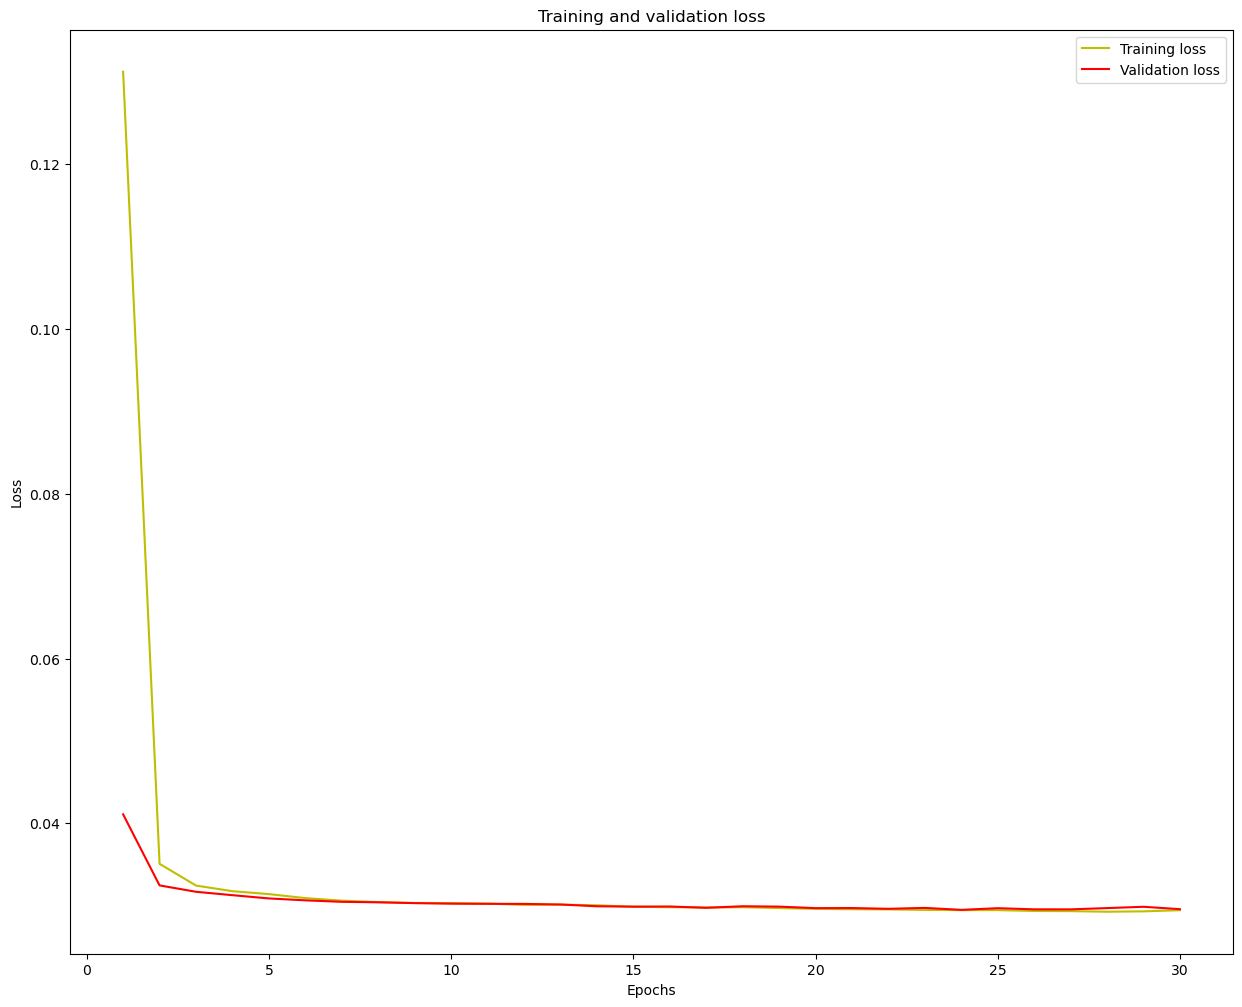

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("\n--- KNN Classifier ---")
print (mean_squared_error(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- KNN Classifier ---
7.442583732057416
[[ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  6 10  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  6 18 15  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  2 23 21 23 10  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  7 15 39 26 13  4  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 16 33 41 36 15  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  6 18 36 32 18  6  1  0  1  1  1  0  0  0  0  0]
 [ 0  0  0  0  3 12 25 20 22  3  6  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  4  6 16  9 10  4  3  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  3  8 10  7  5  1  0  2  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  3  8  6  5  4  2  0  0  1  4  0  0  0  0  0]
 [ 0  0  0  0  0  4  3  9  1  0  3  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  3  2  2  1  1  0  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  2  2  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (mean_squared_error(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
9.589712918660288
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  7  7  5  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 13 16  6  1  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  6 16 22 19  7 10  4  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 10 15 25 26 15  5  6  0  1  1  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  2  4 12 20 35 29 22 10  2  5  2  1  0  0  1  1  0  2  0  0]
 [ 0  0  0  0  2  4 12 24 27 17 16  3  2  6  1  5  0  2  1  1  0  0  0]
 [ 0  0  0  0  0  2  3 20 32  9  9  6  4  4  0  1  2  0  1  0  0  0  0]
 [ 0  0  0  0  2  2  3 12  7 11  4  6  2  1  0  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  8  8  3  4  3  3  0  2  0  1  1  2  0  1  0  0]
 [ 0  0  0  0  0  2  3  5  2  4  6  3  1  1  0  0  1  1  2  1  0  0  1]
 [ 0  0  0  

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (mean_squared_error(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
6.273923444976076
[[ 0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  7  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6 13  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 19 14  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 13 31 31  6  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  6 16 37 33 11  2  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  7 10 27 58 33 12  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 16 32 41 21  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  6 25 37 17  3  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 11 10 17 11  1  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  4 16  8  1  3  0  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  3 17  5  1  3  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  3  4  9  4  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  6  2  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  3  0  4  0  0  1  0  0  0  0  0  

C:\Users\alsgu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(mean_squared_error(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
6.503588516746412
[[ 1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  6  9  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9 15 18  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  3 14 26 29  6  3  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  6 23 28 23 17  6  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 12 27 46 36 18  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 12 32 35 25  5  4  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  8 19 25 24  5  7  2  1  0  1  0  0  0  0  0]
 [ 0  0  0  1  2  2 15 14 10  5  2  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  5 10  5 10  3  3  2  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  3  7  8  5  4  3  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  1  4  6  3  0  2  1  0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  2  7  1  0  2  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  2  1  0  2  0  1  0  0  0  0  0]
 [ 0  0  0  0  